In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
apple_df = pd.read_csv('data\\apple_2011.csv',names =['date','price','percent_change'],skiprows=1)
apple_df

,date,price,percent_change
0,1/3/2011,329.570,XXXXX
1,1/4/2011,331.290,0.005218922
2,1/5/2011,334.000,0.008180144
3,1/6/2011,333.730,-0.000808383
4,1/7/2011,336.120,0.007161478
5,1/10/2011,342.455,0.018847435
6,1/11/2011,341.640,-0.002379875
7,1/12/2011,344.420,0.00813722
8,1/13/2011,345.680,0.003658324
9,1/14/2011,348.480,0.008099977


Populating the interactive namespace from numpy and matplotlib


C:\Users\Shyam\Anaconda2\envs\snakes\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


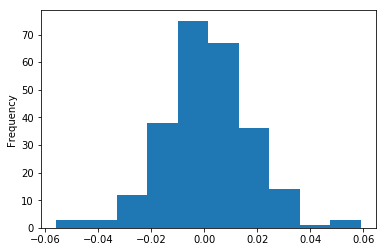

In [4]:
%pylab inline
apple_df.set_value(0,'percent_change','0')
apple_df.percent_change = apple_df.percent_change.astype('float64')
apple_df.percent_change.plot.hist()

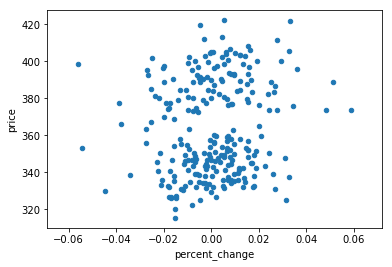

In [5]:
apple_df.plot.scatter('percent_change','price')

In [6]:
#For 10000 values

random.seed(7340)
last_price = apple_df['price'].loc[apple_df['price'].idxmax()]
final_df = np.array([])

count=20
final_value = 0
for j in range(0,10000):
    sample_df = pd.DataFrame(apple_df.percent_change.sample(n=count))

    sample_df = sample_df.reset_index(drop=True)
    sample_df['updated_price'] = 0.0

    sample_df.set_value(0,'updated_price',last_price + last_price*sample_df['percent_change'].loc[sample_df.index[0]])

    sample_df['percent_change']=sample_df['percent_change'] + 1

    for i in range(1,count):
        sample_df.set_value(i,'updated_price',sample_df.updated_price.iloc[[i-1]] * sample_df['percent_change'].loc[sample_df.index[i]])
    
    final_value = sample_df.get_value(count-1,'updated_price')
    final_df = np.append(final_df,final_value)

In [6]:
#Final 1% lowest percentile
final_df = np.sort(final_df)
np.percentile(final_df,1)

363.71667027142826

(array([  2.40000000e+01,   3.21000000e+02,   1.48800000e+03,
          3.12000000e+03,   3.01300000e+03,   1.52600000e+03,
          4.23000000e+02,   7.50000000e+01,   7.00000000e+00,
          3.00000000e+00]),
 array([ 324.36979243,  350.58016411,  376.79053578,  403.00090746,
         429.21127913,  455.42165081,  481.63202248,  507.84239415,
         534.05276583,  560.2631375 ,  586.47350918]),
 <a list of 10 Patch objects>)

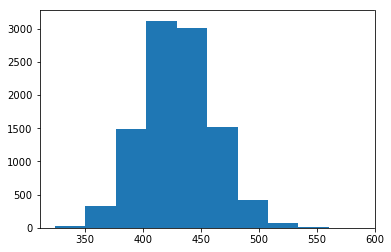

In [7]:
hist(final_df)